In [19]:
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
from scipy.interpolate import RegularGridInterpolator
#from rate_model import rate_model
from time_dependent_model import rate_model
import openpyxl as px
import h5py
import warnings
import pandas as pd
warnings.simplefilter('always', DeprecationWarning)
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>


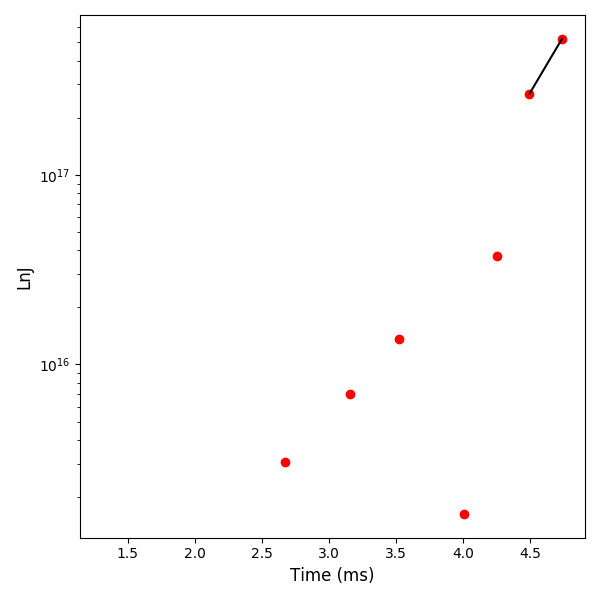

In [51]:
# linear fit y= mx+b, y_intercept b = y - mx
def slope_and_intercept(xs,ys):
    m = ((np.mean(xs) * np.mean(ys)) - np.mean(xs * ys))/ ((np.mean(xs) * np.mean(xs)) - np.mean(xs * xs))
    b = np.mean(ys) - (m * np.mean(xs))
    return m,b

J_Mar1 = np.array([0,0,0,3.04594E+15,7.02331E+15,1.35537E+16,-9.31489E+15,1.62668E+15,3.7397E+16,2.679E+17,5.22652E+17])
time_Mar = np.array([1.068999028,1.554907677,1.943634597,2.429543246,2.915451895,3.401360544,3.644314869,
                     3.887269193,4.130223518,4.373177843,4.616132167,4.859086492])

Mar_shift = [np.average([time_Mar[n+1], time_Mar[n]]) for n in range(len(time_Mar)-1)]

J_Mar = J_Mar[-2:]
t_Mar = Mar_shift[-2:]
m,b = slope_and_intercept(np.array(t_Mar), np.array(np.log(J_Mar)))
line_fit = np.array([(m*x)+b for x in t_Mar])

fig, ax = plt.subplots(figsize=(6,6))
ax.semilogy(Mar_shift, J_Mar1, 'ro')
ax.semilogy(t_Mar,np.exp(line_fit), 'k-')
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('LnJ', fontsize=12)
#plt.savefig('/Users/niloo/Desktop/iceshapes.eps', format ='eps')
plt.tight_layout()
plt.show()


In [60]:
m_tot = (J_vals[0]+m)/2
b_tot = (J_vals[1]+b)/2
J_tot = (m_tot, b_tot)

(6.04508866241126, 17.277434123843282)

In [110]:
t_model = np.linspace(3.2, 4.7, num=1000)
#init = np.array([0.95418641,0.01895735,0.02369668,0.00315956])
init = np.array([1.0, 0., 0., 0.])
k_vals = np.array([7.488073, 0.8920651, 1.74072257])
#J_vals = (3.2048763669424476, 29.905670049402502) # m, b, linear fit to ln(J) vs time [ms], all points
#J_vals = (6.103996016694045, 19.67070822484957) # m, b, linear fit to ln(J) vs time [ms], first 2 points
J_vals = (9.33944598695217, 6.7890664513945325)
#w,m,b,f = rate_model(init, k_vals, 5.85511584e+18, 3.128020134848296e-18, t_model)
w,m,b,f = rate_model(init, k_vals, J_tot, 3.128020134848296e-18, t_model)

<IPython.core.display.Javascript object>


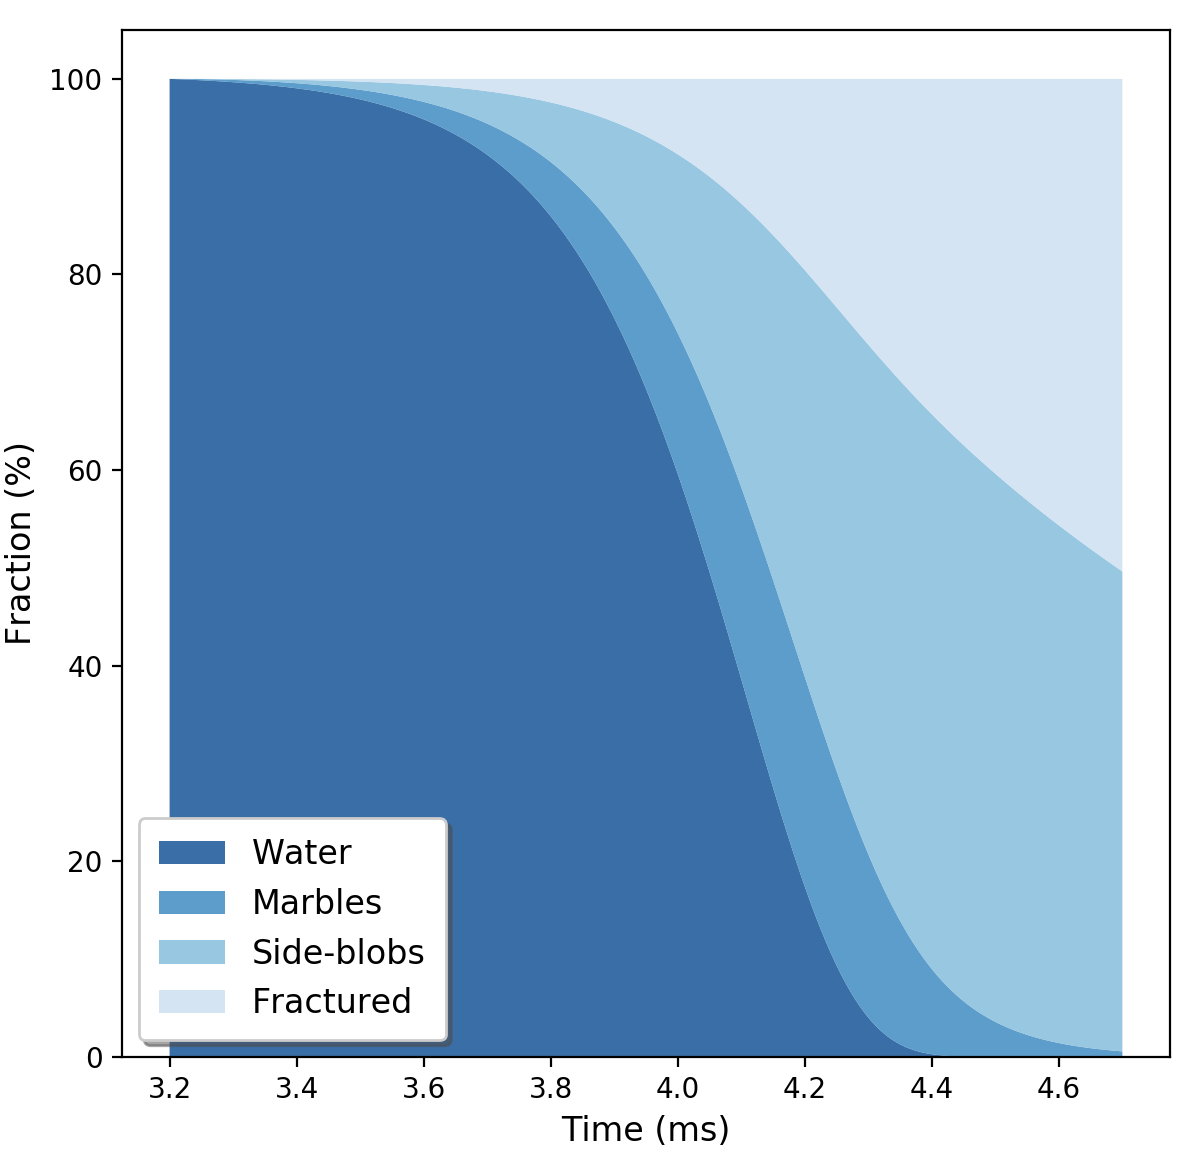

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [138]:
col = plt.cm.Blues(np.linspace(0., 0.9, 5))
fig, ax = plt.subplots(figsize=(6,5.8))
from brokenaxes import brokenaxes
labels = ['Water','Marbles','Side-blobs','Fractured']
ax.stackplot(t_model, w*100,m*100,b*100,f*100, labels=labels, colors = col[::-1], alpha= 0.8)
ax.legend(loc='lower left',fontsize=12, fancybox=True, framealpha=1., shadow=True, borderpad=0.6)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('Fraction (%)', fontsize=12)
plt.savefig('/Users/niloo/Desktop/manuscript/ice_fraction/fig3/Fig3.eps', format ='eps')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


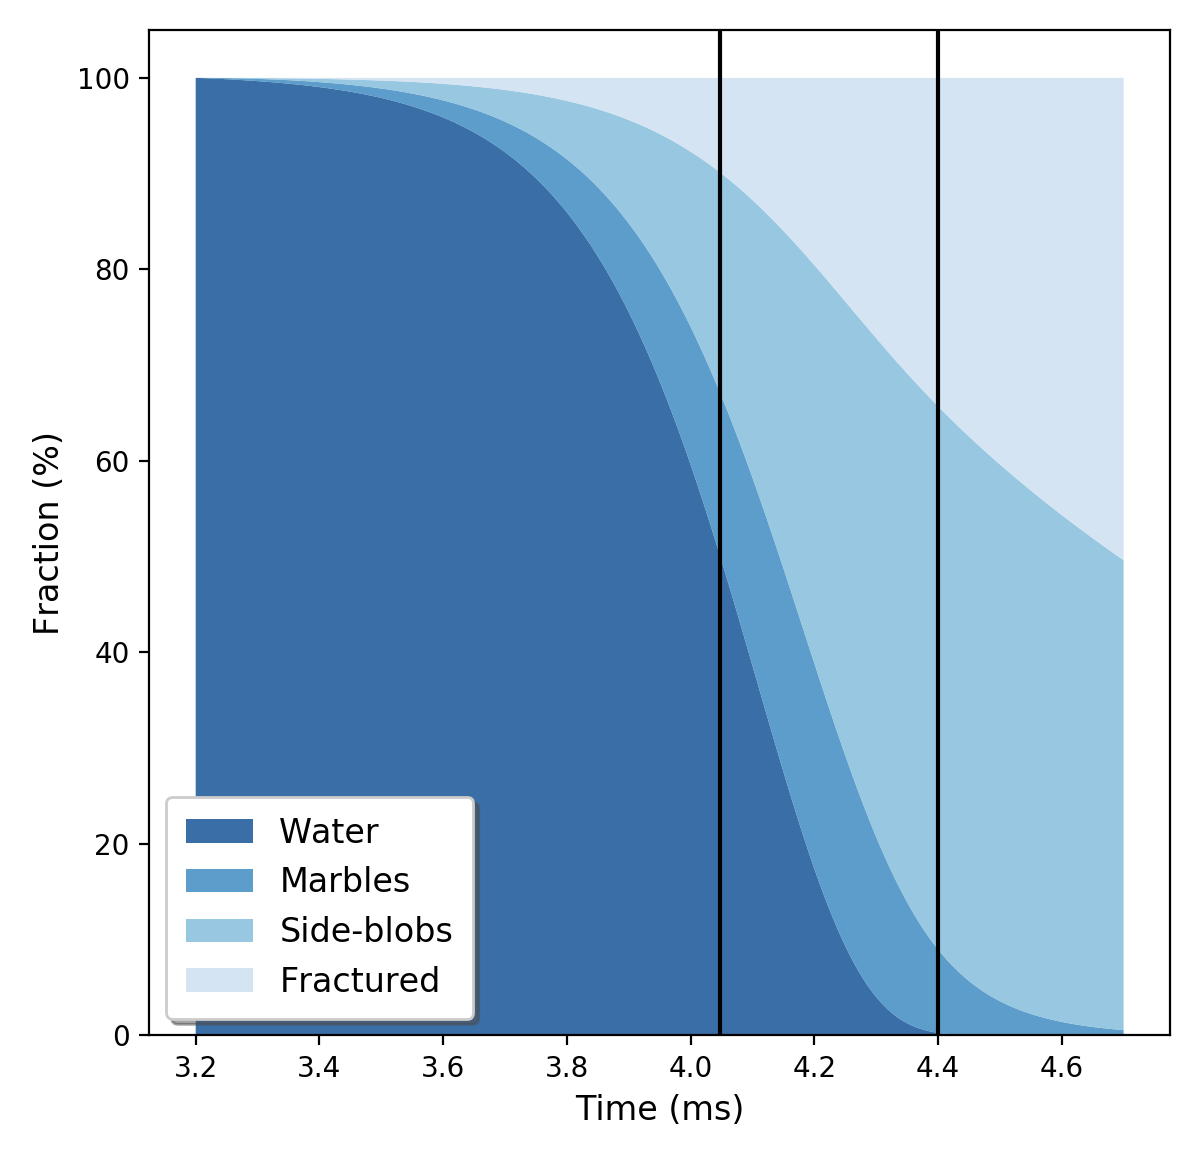

In [121]:
col = plt.cm.Blues(np.linspace(0., 0.9, 5))
fig, ax = plt.subplots(figsize=(6,5.8))
from brokenaxes import brokenaxes
labels = ['Water','Marbles','Side-blobs','Fractured']
ax.stackplot(t_model, w*100,m*100,b*100,f*100, labels=labels, colors = col[::-1], alpha= 0.8)
ax.axvline(x = 4.04834835,color ='k')
ax.axvline(x = 4.4,color ='k')
ax.legend(loc='lower left',fontsize=12, fancybox=True, framealpha=1., shadow=True, borderpad=0.6)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('Fraction (%)', fontsize=12)
plt.savefig('/Users/niloo/Desktop/iceshapes.eps', format ='eps')
plt.tight_layout()
plt.show()

In [128]:
# find nearest value to the q1 position in dsdq 
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

In [131]:
t_model[find_nearest(w_f, 1)[1]]

4.35915915915916

In [126]:
w_f = w*100
np.where(w_f <= 50)
t_model[np.where(w_f <= 50)][0], 4.35915915915916 #close to 1 percent : t_model[np.where(w_f == 1)]

(4.048348348348348,)

In [134]:
abs(4.35915915915916 - 4.04684685)*1000 #microseconds

312.31230915915995

In [89]:
w_f = w*100
np.where(w_f >= 50)
t_1 = abs(t_model[np.where(w_f >= 50)][0]-t_model[np.where(w_f >= 50)][-1])/1000

In [81]:
abs(3.2 - 4.04684685)*1000 #microseconds

846.8468499999994

In [94]:
J = m_tot*653.1531500000006/1000 + b_tot

In [96]:
np.exp(J)

1652909368.3974743

In [ ]:
(353.15315000000066 + 846.8468499999994)